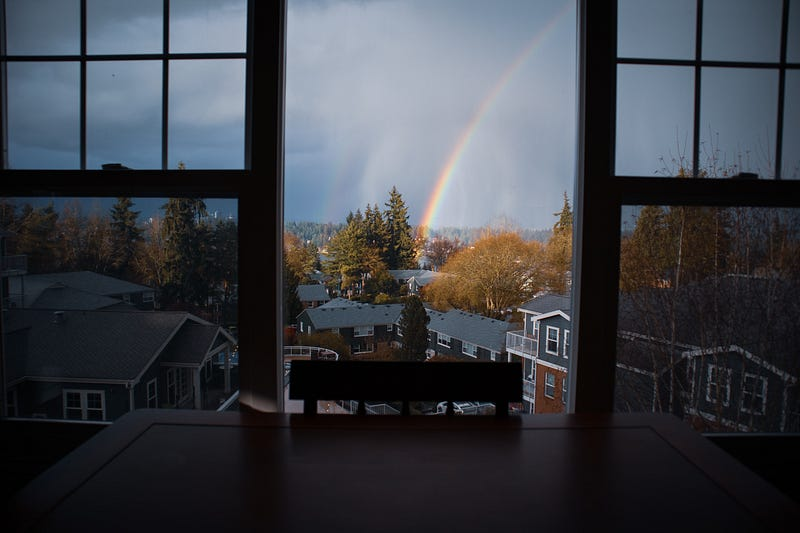

# Regression Analysis Project

**Authors:** Clara Giurgiu, Stephanie Ciaccia

## Overview
Our company prides itself in using technology as a way to help new home buys get the best deals for their family and find their forever homes. We look at historical data on home sales and run statistical analyses and linear regressions to decide on the most crutial parameters to look at when our clients want to purchase their homes.
We will be specifically using linear regression to look at the features that most accurately affect sale prices that will help us infer our client's new home price based on those parameters.

## Business Problem

We are a Real State agency that focuses on guiding prospective homeowners that are new to the state of Washington. A new client has decided they want to move their family to King County, WA, and has entrusted us in finding the most accurate determinants to choose a place they will call home. 

## Data Understanding
For this client, we have sourced data on home sales in king County, WA. One of our datasets was pulled from King County's official website and consists of data from 2021-2022 with over 30 thousands home attributes and selling prices. 

In [2]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# importing King County website data and looking at first 5 rows.
kc_data = pd.read_csv('../Data/kc_house_data.csv')
kc_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/kc_house_data.csv'

In [319]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The data set contains slightly over 30,000 entries and 25 rows of information on home sales in King County, Washington, USA. 
15 out of the 25 columns are numeric and 10 contain string values. 
We can see that there are very few nulls in heat_source and sewer_system colums. 
The target column, price, does not have any nulls and is in the correct format (float). 

In [320]:
# removing scientific notation, setting sig figs and looking at stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4538103795.03,1108535.84,3.41,2.33,2112.42,16723.60,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2882587298.12,896385.66,0.98,0.89,974.04,60382.60,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2064175145.00,648000.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3874010800.00,860000.00,3.00,2.50,1920.00,7480.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,1300000.00,4.00,3.00,2619.50,10579.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


The price column ranges from \\$27K to $30M which could be indicative of outliers. 
Number of bedrooms ranges from 0 to 13, bathrooms from 0 to 10.5.
The min sqft_living is 3 which seems odd for a home and could be an incorrect entry.

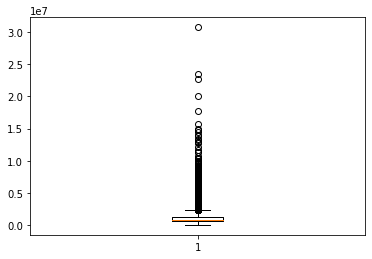

In [321]:
plt.boxplot(x='price',data=kc_data)


It does look like there is one data point that is vastly different from the rest and will be possibly removed for a more accurate analysis. 

In [322]:
# looking at more information on the outlier by filtering prices above 25M which is the maximun for most of the values
kc_data.loc[kc_data['price'] > 25000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
23470,5026900270,11/4/2021,30750000.00,1,3.50,2040,50705,2.00,YES,NO,...,PUBLIC,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.62,-122.28


The outlier at \$30M looks strange compared to the rest of the entries. It has only 1 bedroom, relatively small square footage

In [323]:
kc_data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

As seen above, only to columns have nulls, we will be dropping the rows as it will not significantly affect the 30K + dataset. 

## Data Preparation


In [324]:
# dropping null values, saving in place
kc_data = kc_data.dropna()
kc_data.shape

(30111, 25)

In [325]:
# sanity check
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

After dropping null values, we still have a substantial amount of data to work with.

In [326]:
# converting date column to date time for analysis
kc_data['date'] = pd.to_datetime(kc_data['date'])
kc_data.describe(datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30111.00,30111,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,2021-11-21 01:16:22.405101312,1108970.65,3.42,2.34,2113.34,16648.80,1.54,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32
min,1000055.00,2021-06-10 00:00:00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2070850032.50,2021-08-18 00:00:00,649236.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3876000200.00,2021-11-03 00:00:00,860000.00,3.00,2.50,1920.00,7477.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,2022-03-07 00:00:00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,2022-06-09 00:00:00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07
std,2882235761.32,NaN,896515.83,0.98,0.89,973.45,59933.03,0.57,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72


We are working with data from June 2021 to June 2022.

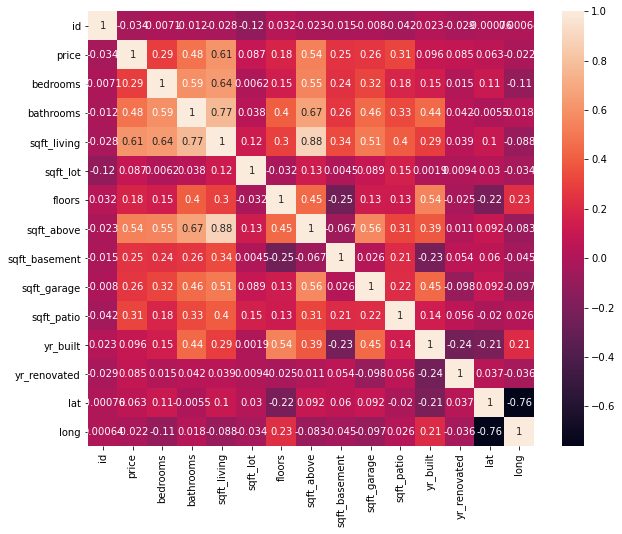

In [327]:
# looking at corr of numeric variables
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(kc_data.corr(), annot=True)
plt.show()

In [331]:
#saving for partner to use
stepth_analysis = kc_data
stepth_analysis.to_csv('../Data/steph.csv')

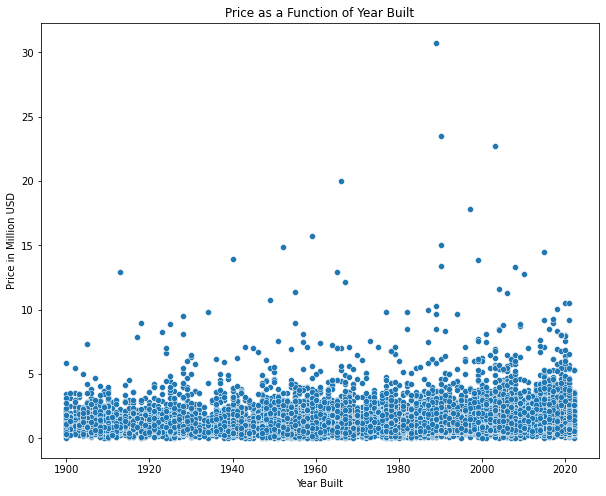

In [506]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=kc_data['price']/1000000, x=kc_data['yr_built'])
plt.xlabel('Year Built')
plt.ylabel('Price in Million USD')
plt.title('Price as a Function of Year Built');

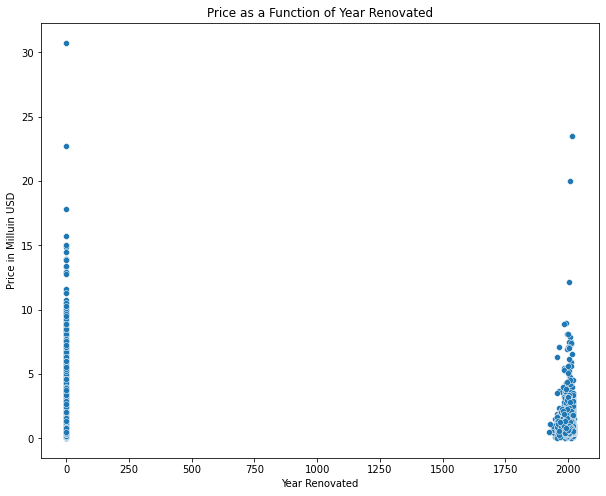

In [508]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=kc_data['price']/1000000, x=kc_data['yr_renovated'])
plt.xlabel('Year Renovated')
plt.ylabel('Price in Milluin USD')
plt.title('Price as a Function of Year Renovated');

The strongest positive correlation with price is sqft_living, followed by sqft_above, bathrooms, sqft_patio and bedrooms.
The least correlated ones are yr_built, yr_renovated and lat & long.

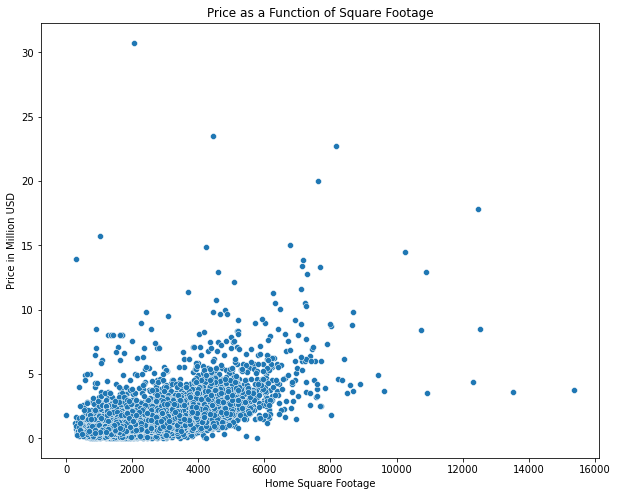

In [452]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=kc_data['price']/1000000, x=kc_data['sqft_living'])

plt.xlabel('Home Square Footage')
plt.ylabel('Price in Million USD')
plt.title('Price as a Function of Square Footage');

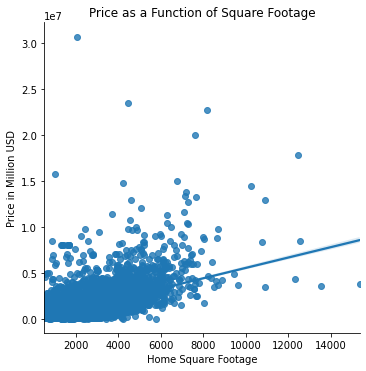

In [516]:

sns.lmplot(data=kc_data, x = 'sqft_living', y = 'price')
plt.xlabel('Home Square Footage')
plt.ylabel('Price in Million USD')
plt.title('Price as a Function of Square Footage');

Although small, we can see a positive trend between home square footage and prices.

In [517]:
# removing least correlated columns
kc_data = kc_data.drop(columns=['yr_built','yr_renovated', 'lat', 'long'])
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,address
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,"2102 Southeast 21st Court, Renton, Washington ..."
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing..."
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,"8504 South 113th Street, Seattle, Washington 9..."
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington..."
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [518]:
# firltering homes where price is less than $25M
kc_data = kc_data.loc[kc_data['price'] <= 25000000]
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
count,30039.00,30039.00,30039.00,30039.00,30039.00,30039.00,30039.00,30039.00,30039.00,30039.00,30039.00
mean,4539484923.00,1108279.85,3.42,2.34,2117.35,16616.28,1.54,1813.68,477.65,331.15,217.83
std,2882517546.45,877444.00,0.97,0.89,971.11,59901.96,0.57,876.15,580.08,285.60,245.38
min,1000055.00,27360.00,0.00,0.00,510.00,402.00,1.00,300.00,0.00,0.00,0.00
25%,2067200372.50,649950.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00
50%,3876000120.00,860000.00,3.00,2.50,1920.00,7479.00,1.50,1560.00,0.00,400.00,150.00
75%,7287100168.00,1300000.00,4.00,3.00,2620.00,10560.00,2.00,2270.00,940.00,510.00,320.00
max,9904000012.00,23500000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00


There is an incorrect entry based on the .describe() showing sqft_living of 3 and according to reasearch, it is listed on "Redfin.com" as 3,325 sqft. https://www.redfin.com/WA/Duvall/31072-NE-165th-St-98019/home/22591192. Several other entries followed the same pattern and we decided to remove entries with sqft_living less than 500.

In [519]:
kc_data = kc_data.loc[kc_data['sqft_living'] > 500]

In [520]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30039 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30039 non-null  int64         
 1   date           30039 non-null  datetime64[ns]
 2   price          30039 non-null  float64       
 3   bedrooms       30039 non-null  int64         
 4   bathrooms      30039 non-null  float64       
 5   sqft_living    30039 non-null  int64         
 6   sqft_lot       30039 non-null  int64         
 7   floors         30039 non-null  float64       
 8   waterfront     30039 non-null  object        
 9   greenbelt      30039 non-null  object        
 10  nuisance       30039 non-null  object        
 11  view           30039 non-null  object        
 12  condition      30039 non-null  object        
 13  grade          30039 non-null  object        
 14  heat_source    30039 non-null  object        
 15  sewer_system   3003

In [521]:
# exploring string columns
kc_data.describe(include='object')

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
count,30039,30039,30039,30039,30039,30039,30039,30039,30039
unique,2,2,2,5,5,12,7,4,29447
top,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,"Avenue, 108 Foothill Blvd, Rancho Cucamonga, C..."
freq,29537,29268,24807,26504,18469,11688,20561,25711,38


Out of the 9 columns, we can separate the addresses to group by city.

In [522]:
kc_data['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States     38
Delridge Way Southwest, Seattle, Washington 98106, United States                 24
9th Ave, Nebraska City, Nebraska 68410, United States                            21
South 35th Avenue, Bellevue, Nebraska 68123, United States                       20
15th Avenue, Plattsmouth, Nebraska 68048, United States                          17
                                                                                 ..
11048 Lotus Place South, Seattle, Washington 98178, United States                 1
4927 South 308th Street, Auburn, Washington 98001, United States                  1
10217 Southeast 236th Street, Kent, Washington 98031, United States               1
4613 South Brandon Street, Seattle, Washington 98118, United States               1
3515 Northeast 158th Place, Lake Forest Park, Washington 98155, United States     1
Name: address, Length: 29447, dtype: int64

Interestingly, it looks like there are entries for homes outside of Washington state. Will will filter out homes in WA only

In [523]:
# firltering homes that have "Washington" in the address
wa_only_df = kc_data[kc_data['address'].str.contains('Washington')]
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29136 non-null  int64         
 1   date           29136 non-null  datetime64[ns]
 2   price          29136 non-null  float64       
 3   bedrooms       29136 non-null  int64         
 4   bathrooms      29136 non-null  float64       
 5   sqft_living    29136 non-null  int64         
 6   sqft_lot       29136 non-null  int64         
 7   floors         29136 non-null  float64       
 8   waterfront     29136 non-null  object        
 9   greenbelt      29136 non-null  object        
 10  nuisance       29136 non-null  object        
 11  view           29136 non-null  object        
 12  condition      29136 non-null  object        
 13  grade          29136 non-null  object        
 14  heat_source    29136 non-null  object        
 15  sewer_system   2913

We now have 29,136 entries that are only in Washington state.

In [524]:
wa_only_df['address'].value_counts()

Delridge Way Southwest, Seattle, Washington 98106, United States                 24
Interlake Avenue North, Seattle, Washington 98103, United States                 11
Northeast 201st Street, Woodinville, Washington 98072, United States             11
26th Avenue, Seattle, Washington 98122, United States                             9
12006 31st Ave NE, Seattle, Washington 98125, United States                       7
                                                                                 ..
9017 4th Avenue Northwest, Seattle, Washington 98117, United States               1
26812 Northeast Beadonhall Street, Duvall, Washington 98019, United States        1
3128 Hunter Court, Enumclaw, Washington 98022, United States                      1
8013 26th Avenue Northwest, Seattle, Washington 98117, United States              1
3515 Northeast 158th Place, Lake Forest Park, Washington 98155, United States     1
Name: address, Length: 28973, dtype: int64

We also want to isolate cities and zipcodes.

In [525]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['address'].str.split(',', expand=True)], axis=1)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,address,0,1,2,3,4,5
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None


In [526]:
# Renaming address columns
wa_only_df.rename(columns={0:'street_name',1:'city',2:'state_zip'}, inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,address,street_name,city,state_zip,3,4,5
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None


In [527]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['state_zip'].str.split(' ', expand=True)], axis=1,)
wa_only_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,street_name,city,state_zip,3,4,5,0,1,2
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None,,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None,,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None,,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None,,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None,,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.00,5,2.00,1910,4000,1.50,NO,NO,...,"4673 Eastern Avenue North, Seattle, Washington...",4673 Eastern Avenue North,Seattle,Washington 98103,United States,None,None,,Washington,98103
30151,194000695,2021-06-16,1313000.00,3,2.00,2020,5800,2.00,NO,NO,...,"4131 44th Avenue Southwest, Seattle, Washingto...",4131 44th Avenue Southwest,Seattle,Washington 98116,United States,None,None,,Washington,98116
30152,7960100080,2022-05-27,800000.00,3,2.00,1620,3600,1.00,NO,NO,...,"910 Martin Luther King Jr Way, Seattle, Washin...",910 Martin Luther King Jr Way,Seattle,Washington 98122,United States,None,None,,Washington,98122
30153,2781280080,2022-02-24,775000.00,3,2.50,2570,2889,2.00,NO,NO,...,"17127 114th Avenue Southeast, Renton, Washingt...",17127 114th Avenue Southeast,Renton,Washington 98055,United States,None,None,,Washington,98055


In [528]:
# renaming state and zip columns in place
wa_only_df.rename(columns={1:'state', 2: 'zip_code'}, inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,street_name,city,state_zip,3,4,5,0,state,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None,,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None,,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None,,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None,,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None,,Washington,98027


In [529]:
wa_only_df.drop(columns=['address', 'state_zip', 3, 4, 5, 0], inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,Gas,PUBLIC,1180,0,0,40,2102 Southeast 21st Court,Renton,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,Oil,PUBLIC,1570,1570,0,240,11231 Greenwood Avenue North,Seattle,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,Gas,PUBLIC,1580,1580,0,0,8504 South 113th Street,Seattle,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,Gas,PUBLIC,1090,1070,200,270,4079 Letitia Avenue South,Seattle,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,Electricity,PUBLIC,1120,550,550,30,2193 Northwest Talus Drive,Issaquah,Washington,98027


After formatting the address column to isolate by zipcode, we want to look into other columns that may not be useful in our analysis.

In [530]:
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29136 non-null  int64         
 1   date           29136 non-null  datetime64[ns]
 2   price          29136 non-null  float64       
 3   bedrooms       29136 non-null  int64         
 4   bathrooms      29136 non-null  float64       
 5   sqft_living    29136 non-null  int64         
 6   sqft_lot       29136 non-null  int64         
 7   floors         29136 non-null  float64       
 8   waterfront     29136 non-null  object        
 9   greenbelt      29136 non-null  object        
 10  nuisance       29136 non-null  object        
 11  view           29136 non-null  object        
 12  condition      29136 non-null  object        
 13  grade          29136 non-null  object        
 14  heat_source    29136 non-null  object        
 15  sewer_system   2913

In [531]:
wa_only_df['city'].unique()

array([' Renton', ' Seattle', ' Issaquah', ' Shoreline', ' Burien',
       ' Kent', ' Federal Way', ' Duvall', ' Auburn', ' Bellevue',
       ' Maple Valley', ' Woodinville', ' Redmond', ' Medina',
       ' Lake Forest Park', ' SeaTac', ' Clyde Hill', ' North Bend',
       ' Bothell', ' Kirkland', ' Des Moines', ' Newcastle',
       ' Mercer Island', ' Carnation', ' Sammamish', ' Snoqualmie',
       ' Enumclaw', ' Covington', ' Fall City', ' Normandy Park',
       ' Algona', ' Kenmore', ' Tukwila', ' Black Diamond', ' Pacific',
       ' Vashon', ' Hunts Point', ' Ravensdale', ' Dilworth',
       ' Beaux Arts', ' Preston', ' Skykomish', ' Milton', ' Monroe',
       ' Ames Lake', ' Yarrow Point', ' Snohomish', ' Lakeland North',
       ' Tulalip', ' Hobart', ' White Center', ' Washington',
       ' 35th Ave SW & SW Holden', ' Spanaway', ' Baring', ' Arlington',
       ' Eatonville', ' Puyallup', ' Vancouver', ' Spokane',
       ' Marysville', ' Union Hill-Novelty Hill', ' Clarkston',
   

We noticed that the city column values had a whitespace in front and there are a few that look like street addresses. 

In [532]:
# removing space in front of city name
wa_only_df['city'] = wa_only_df['city'].str.strip()

In [533]:
cities = wa_only_df['city'].unique()
print(sorted(cities))

['2301 NE Northlake Way', '35th Ave SW & SW Holden', 'Algona', 'Ames Lake', 'Arlington', 'Auburn', 'Baring', 'Beaux Arts', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clarkston', 'Clyde Hill', 'Cottage Lake', 'Covington', 'Dash Point', 'Des Moines', 'Dilworth', 'Duvall', 'Eatonville', 'Enumclaw', 'Fairwood', 'Fall City', 'Federal Way', 'Hobart', 'Hunts Point', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Lakeland North', 'Maple Valley', 'Marysville', 'Medina', 'Mercer Island', 'Milton', 'Monroe', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Puyallup', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snohomish', 'Snoqualmie', 'Snoqualmie Pass', 'Spanaway', 'Spokane', 'Tukwila', 'Tulalip', 'Union Hill-Novelty Hill', 'Vancouver', 'Vashon', 'Washington', 'White Center', 'Woodinville', 'Yarrow Point']


In [534]:
wa_only_df.loc[wa_only_df['city'] == '2301 NE Northlake Way']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
19560,4083306403,2022-02-22,1205000.00,3,2.00,1400,1445,2.00,NO,NO,...,Electricity,PUBLIC,1140,510,250,460,Sunnyside Avenue North Boat Ramp,2301 NE Northlake Way,Seattle,None


In [535]:
wa_only_df.loc[wa_only_df['city'] == '35th Ave SW & SW Holden']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
4818,139000091,2022-04-06,1180000.00,2,2.50,1260,700,2.00,NO,NO,...,Electricity,PUBLIC,840,420,0,390,35th Ave SW & SW Holden Bus Stop,35th Ave SW & SW Holden,Seattle,None
17496,139000123,2021-10-20,1200000.00,3,2.50,1310,1251,2.00,NO,NO,...,Gas,PUBLIC,1100,390,180,520,35th Ave SW & SW Holden Bus Stop,35th Ave SW & SW Holden,Seattle,None
26031,139000125,2022-01-25,1030000.00,3,2.50,1360,2227,2.00,NO,NO,...,Gas,PUBLIC,960,400,0,400,35th Ave SW & SW Holden Bus Stop,35th Ave SW & SW Holden,Seattle,None


After a quick search at the cities that have addresses one is a boat and 3 other entries point to a bus stop, we will remove these from out set.
Additionally, the cities list may reflect names of further jurisdiction within the cities. For example, 'Ames Lake' is located in the city of 'Carnation. This can potentially skew an analysis if looking into the cities. We will try to avoid that. 

In [536]:
# Condition Column
wa_only_df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

 From data documentation:
 Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [537]:
cond = wa_only_df.groupby('condition').mean()
cond

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
condition,,,,,,,,,,,
Average,4566662853.98,1141315.93,3.45,2.43,2220.42,16273.99,1.66,1960.14,440.65,360.39,210.06
Fair,4044811176.29,791033.09,2.93,1.55,1527.28,45116.11,1.22,1360.70,529.14,140.88,129.46
Good,4526894602.79,1054346.40,3.43,2.18,2014.52,18352.00,1.33,1664.57,525.49,322.06,227.59
Poor,4109177712.07,692551.57,2.88,1.45,1375.89,43819.38,1.23,1203.21,531.07,70.89,165.89
Very Good,4438668397.43,1127194.82,3.49,2.29,2030.85,15907.95,1.27,1574.64,596.86,266.73,233.69


We can see the average price and other features of homes based on their condition at the time of sale.

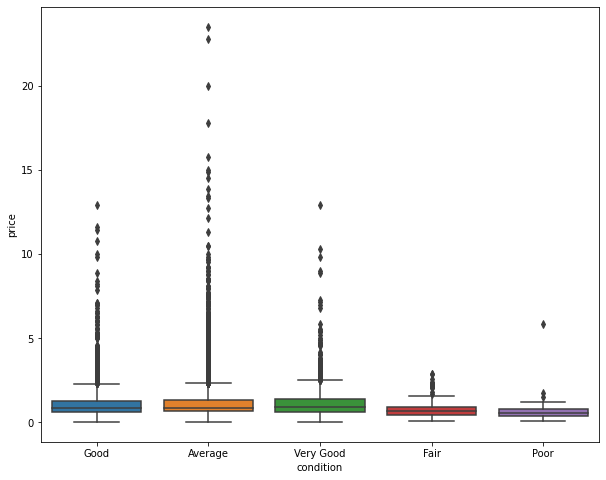

In [538]:
# price vs condition bar
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(y=wa_only_df['price']/1000000, x=wa_only_df['condition']);

In [539]:
wa_only_df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

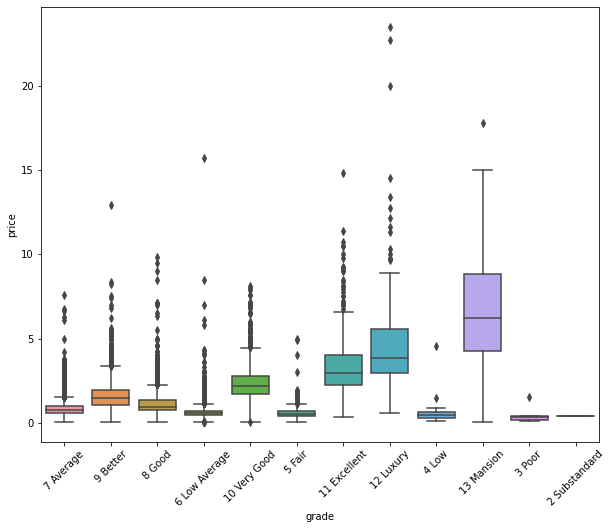

In [540]:
# grade vs price 
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(y=wa_only_df['price']/1000000, x=wa_only_df['grade'])
plt.xticks(rotation = 45);

In [270]:
# saving cleaned dataset
wa_only_df.to_csv('../Data/wa_cleaned.csv')

## Data Modeling


### Numeric Features Models

In [541]:
wa_only_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'street_name', 'city',
       'state', 'zip_code'],
      dtype='object')

In [542]:
# simple model
Y = wa_only_df['price']
X = sm.add_constant(wa_only_df['sqft_living'])

wa_simple = sm.OLS(endog=Y, exog=X).fit()
wa_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.951e+04
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:30:37   Log-Likelihood:            -4.3253e+05
No. Observations:               29136   AIC:                         8.651e+05
Df Residuals:                   29134   BIC:                         8.651e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.035e+05   9565.718    -10.821      0.000   -1.22e+05   -8.48e+04
sqft_living   569.2783      4.075    139.694      0.000     561.291     577.266
==============================================================================
Omnibus:                    35200.781   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13557340.773
Skew:                           6.082   Prob(JB):                         0.00
Kurtosis:                     107.974   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [545]:
# creating new dataframe with numeric colums
wa_num = wa_only_df[['price','sqft_lot', 'floors', 'sqft_basement','sqft_garage', 'sqft_living', 'sqft_above', 'bathrooms','sqft_patio', 'bedrooms']]
wa_num

,price,sqft_lot,floors,sqft_basement,sqft_garage,sqft_living,sqft_above,bathrooms,sqft_patio,bedrooms
0,675000.00,7140,1.00,0,0,1180,1180,1.00,40,4
1,920000.00,6703,1.00,1570,0,2770,1570,2.50,240,5
2,311000.00,6156,1.00,1580,0,2880,1580,2.00,0,6
3,775000.00,1400,2.00,1070,200,2160,1090,3.00,270,3
4,592500.00,758,2.00,550,550,1120,1120,2.00,30,2
...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,4000,1.50,1130,0,1910,1600,2.00,210,5
30151,1313000.00,5800,2.00,0,0,2020,2020,2.00,520,3
30152,800000.00,3600,1.00,920,240,1620,940,2.00,110,3
30153,775000.00,2889,2.00,740,480,2570,1830,2.50,100,3


In [546]:
wa_num.describe()

,price,sqft_lot,floors,sqft_basement,sqft_garage,sqft_living,sqft_above,bathrooms,sqft_patio,bedrooms
count,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00
mean,1112246.74,17077.59,1.52,482.33,337.14,2135.61,1829.60,2.34,216.83,3.44
std,875649.37,60763.75,0.55,586.34,286.03,974.20,878.41,0.89,246.82,0.97
min,27360.00,402.00,1.00,0.00,0.00,510.00,300.00,0.00,0.00,0.00
25%,645000.00,5000.00,1.00,0.00,0.00,1440.00,1190.00,2.00,40.00,3.00
50%,869000.00,7560.00,1.50,0.00,400.00,1950.00,1580.00,2.50,150.00,3.00
75%,1310000.00,10754.00,2.00,960.00,520.00,2640.00,2290.25,3.00,310.00,4.00
max,23500000.00,3253932.00,4.00,8020.00,3580.00,15360.00,12660.00,10.50,4370.00,13.00


In [547]:
# separting data frame into model variables
mlr_y = wa_num['price']
mlr_x = wa_num.drop('price', axis=1)
mlr_x.head()

,sqft_lot,floors,sqft_basement,sqft_garage,sqft_living,sqft_above,bathrooms,sqft_patio,bedrooms
0,7140,1.00,0,0,1180,1180,1.00,40,4
1,6703,1.00,1570,0,2770,1570,2.50,240,5
2,6156,1.00,1580,0,2880,1580,2.00,0,6
3,1400,2.00,1070,200,2160,1090,3.00,270,3
4,758,2.00,550,550,1120,1120,2.00,30,2


In [548]:
mlr_y

0        675000.00
1        920000.00
2        311000.00
3        775000.00
4        592500.00
           ...    
30150   1555000.00
30151   1313000.00
30152    800000.00
30153    775000.00
30154    500000.00
Name: price, Length: 29136, dtype: float64

In [549]:
predictors = sm.add_constant(mlr_x)
predictors

,const,sqft_lot,floors,sqft_basement,sqft_garage,sqft_living,sqft_above,bathrooms,sqft_patio,bedrooms
0,1.00,7140,1.00,0,0,1180,1180,1.00,40,4
1,1.00,6703,1.00,1570,0,2770,1570,2.50,240,5
2,1.00,6156,1.00,1580,0,2880,1580,2.00,0,6
3,1.00,1400,2.00,1070,200,2160,1090,3.00,270,3
4,1.00,758,2.00,550,550,1120,1120,2.00,30,2
...,...,...,...,...,...,...,...,...,...,...
30150,1.00,4000,1.50,1130,0,1910,1600,2.00,210,5
30151,1.00,5800,2.00,0,0,2020,2020,2.00,520,3
30152,1.00,3600,1.00,920,240,1620,940,2.00,110,3
30153,1.00,2889,2.00,740,480,2570,1830,2.50,100,3


In [550]:
# multiple regression model on numeric variables
wa_mlr = sm.OLS(endog=mlr_y, exog=predictors).fit()
wa_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2485.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:31:02   Log-Likelihood:            -4.3170e+05
No. Observations:               29136   AIC:                         8.634e+05
Df Residuals:                   29126   BIC:                         8.635e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.867e+05   1.74e+04     10.743      0.000    1.53e+05    2.21e+05
sqft_lot         -0.1234      0.065     -1.892      0.058      -0.251       0.004
floors        -9.886e+04   8992.835    -10.993      0.000   -1.16e+05   -8.12e+04
sqft_basement   236.8076     12.709     18.633      0.000     211.897     261.718
sqft_garage    -287.3906     16.721    -17.187      0.000    -320.165    -254.616
sqft_living     287.8413     17.518     16.431      0.000     253.504     322.178
sqft_above      372.2810     17.722     21.007      0.000     337.545     407.017
bathrooms      9.857e+04   7564.408     13.031      0.000    8.37e+04    1.13e+05
sqft_patio      239.5983     17.417     13.756      0.000     205.459     273.737
bedrooms      -1.504e+05   5305.179    -28.343      0.000   -1.61e+05    -1.4e+05
==============================================================================
Omnibus:                    34308.966   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12685522.175
Skew:                           5.801   Prob(JB):                         0.00
Kurtosis:                     104.562   Cond. No.                     3.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [551]:
# scaling

preds_scaled = (mlr_x - np.mean(mlr_x)) / np.std(mlr_x)

In [552]:
scaler = StandardScaler()

In [553]:
scaler.fit(mlr_x)

StandardScaler()

In [431]:
scaler.fit_transform(mlr_x)

array([[-0.16354753, -0.94469023, -0.82262464, ..., -1.49616626,
        -0.7164674 ,  0.5747878 ],
       [-0.17073944, -0.94469023,  1.85504557, ...,  0.18349698,
         0.09386582,  1.6061986 ],
       [-0.17974167, -0.94469023,  1.87210079, ..., -0.37639076,
        -0.87853405,  2.63760941],
       ...,
       [-0.22180695, -0.94469023,  0.74645599, ..., -0.37639076,
        -0.43285077, -0.45662301],
       [-0.23350821,  0.87667653,  0.43946196, ...,  0.18349698,
        -0.47336744, -0.45662301],
       [-0.09906718, -0.94469023, -0.82262464, ..., -0.93627851,
        -0.87853405, -0.45662301]])

In [554]:
mlr_x.describe()

,sqft_lot,floors,sqft_basement,sqft_garage,sqft_living,sqft_above,bathrooms,sqft_patio,bedrooms
count,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00
mean,17077.59,1.52,482.33,337.14,2135.61,1829.60,2.34,216.83,3.44
std,60763.75,0.55,586.34,286.03,974.20,878.41,0.89,246.82,0.97
min,402.00,1.00,0.00,0.00,510.00,300.00,0.00,0.00,0.00
25%,5000.00,1.00,0.00,0.00,1440.00,1190.00,2.00,40.00,3.00
50%,7560.00,1.50,0.00,400.00,1950.00,1580.00,2.50,150.00,3.00
75%,10754.00,2.00,960.00,520.00,2640.00,2290.25,3.00,310.00,4.00
max,3253932.00,4.00,8020.00,3580.00,15360.00,12660.00,10.50,4370.00,13.00


In [555]:
preds_scaled.describe()

,sqft_lot,floors,sqft_basement,sqft_garage,sqft_living,sqft_above,bathrooms,sqft_patio,bedrooms
count,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00,29136.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.27,-0.94,-0.82,-1.18,-1.67,-1.74,-2.62,-0.88,-3.55
25%,-0.20,-0.94,-0.82,-1.18,-0.71,-0.73,-0.38,-0.72,-0.46
50%,-0.16,-0.03,-0.82,0.22,-0.19,-0.28,0.18,-0.27,-0.46
75%,-0.10,0.88,0.81,0.64,0.52,0.52,0.74,0.38,0.57
max,53.27,4.52,12.86,11.34,13.57,12.33,9.14,16.83,9.86


In [556]:
predictors = sm.add_constant(preds_scaled)
wa_mlr2= sm.OLS(mlr_y, predictors).fit()
wa_mlr2.summary().tables[0]

Dep. Variable:,price,R-squared:,0.434
Model:,OLS,Adj. R-squared:,0.434
Method:,Least Squares,F-statistic:,2485.
Date:,"Tue, 28 Mar 2023",Prob (F-statistic):,0.00
Time:,18:31:16,Log-Likelihood:,-4.3170e+05
No. Observations:,29136,AIC:,8.634e+05
Df Residuals:,29126,BIC:,8.635e+05
Df Model:,9,,
Covariance Type:,nonrobust,,


In [557]:
wa_mlr.summary().tables[0]

Dep. Variable:,price,R-squared:,0.434
Model:,OLS,Adj. R-squared:,0.434
Method:,Least Squares,F-statistic:,2485.
Date:,"Tue, 28 Mar 2023",Prob (F-statistic):,0.00
Time:,18:31:18,Log-Likelihood:,-4.3170e+05
No. Observations:,29136,AIC:,8.634e+05
Df Residuals:,29126,BIC:,8.635e+05
Df Model:,9,,
Covariance Type:,nonrobust,,


The model Adjusted R 

### Categorical Features Models

In [562]:
cond_dummy = pd.get_dummies(wa_only_df['condition'])

In [563]:
grade_dummy = pd.get_dummies(wa_only_df['grade'])

In [564]:
water_dummy = pd.get_dummies(wa_only_df['waterfront'])

In [565]:
X_cats = pd.concat([mlr_x, cond_dummy, grade_dummy, water_dummy], axis=1)
X_cats

,sqft_lot,floors,sqft_basement,sqft_garage,sqft_living,sqft_above,bathrooms,sqft_patio,bedrooms,Average,...,2 Substandard,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better,NO,YES
0,7140,1.00,0,0,1180,1180,1.00,40,4,0,...,0,0,0,0,0,1,0,0,1,0
1,6703,1.00,1570,0,2770,1570,2.50,240,5,1,...,0,0,0,0,0,1,0,0,1,0
2,6156,1.00,1580,0,2880,1580,2.00,0,6,1,...,0,0,0,0,0,1,0,0,1,0
3,1400,2.00,1070,200,2160,1090,3.00,270,3,1,...,0,0,0,0,0,0,0,1,1,0
4,758,2.00,550,550,1120,1120,2.00,30,2,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,4000,1.50,1130,0,1910,1600,2.00,210,5,0,...,0,0,0,0,0,0,1,0,1,0
30151,5800,2.00,0,0,2020,2020,2.00,520,3,1,...,0,0,0,0,0,1,0,0,1,0
30152,3600,1.00,920,240,1620,940,2.00,110,3,1,...,0,0,0,0,0,1,0,0,1,0
30153,2889,2.00,740,480,2570,1830,2.50,100,3,1,...,0,0,0,0,0,0,1,0,1,0


In [566]:
cat_model = sm.OLS(endog=mlr_y, exog=sm.add_constant(X_cats)).fit()
cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1358.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:32:00   Log-Likelihood:            -4.2874e+05
No. Observations:               29136   AIC:                         8.575e+05
Df Residuals:                   29110   BIC:                         8.577e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.625e+05   3.45e+04     27.873      0.000    8.95e+05    1.03e+06
sqft_lot         -0.1694      0.059     -2.859      0.004      -0.285      -0.053
floors        -1.004e+05   8800.099    -11.409      0.000   -1.18e+05   -8.32e+04
sqft_basement   226.8607     11.598     19.560      0.000     204.128     249.594
sqft_garage    -335.7046     15.680    -21.409      0.000    -366.439    -304.971
sqft_living      60.3514     16.210      3.723      0.000      28.578      92.124
sqft_above      281.7947     16.254     17.337      0.000     249.936     313.653
bathrooms      7.201e+04   6937.100     10.380      0.000    5.84e+04    8.56e+04
sqft_patio       91.3570     15.950      5.728      0.000      60.094     122.620
bedrooms      -4.515e+04   5021.027     -8.991      0.000    -5.5e+04   -3.53e+04
Average        1.905e+05   1.95e+04      9.768      0.000    1.52e+05    2.29e+05
Fair           1.375e+05   3.71e+04      3.701      0.000    6.47e+04     2.1e+05
Good           2.492e+05   1.97e+04     12.644      0.000    2.11e+05    2.88e+05
Poor            6.36e+04   6.69e+04      0.951      0.341   -6.74e+04    1.95e+05
Very Good      3.217e+05   2.08e+04     15.434      0.000    2.81e+05    3.63e+05
10 Very Good   1.902e+05   5.74e+04      3.314      0.001    7.77e+04    3.03e+05
11 Excellent   9.708e+05   6.25e+04     15.545      0.000    8.48e+05    1.09e+06
12 Luxury      2.127e+06   7.62e+04     27.908      0.000    1.98e+06    2.28e+06
13 Mansion      3.47e+06   1.29e+05     26.927      0.000    3.22e+06    3.72e+06
2 Substandard -6.724e+05   5.53e+05     -1.216      0.224   -1.76e+06    4.12e+05
3 Poor        -9.753e+05   2.53e+05     -3.853      0.000   -1.47e+06   -4.79e+05
4 Low           -8.7e+05   1.12e+05     -7.802      0.000   -1.09e+06   -6.51e+05
5 Fair        -8.312e+05   6.27e+04    -13.260      0.000   -9.54e+05   -7.08e+05
6 Low Average -8.209e+05   5.67e+04    -14.471      0.000   -9.32e+05    -7.1e+05
7 Average     -7.573e+05   5.57e+04    -13.594      0.000   -8.67e+05   -6.48e+05
8 Good        -6.043e+05   5.56e+04    -10.877      0.000   -7.13e+05   -4.95e+05
9 Better       -2.63e+05   5.59e+04     -4.701      0.000   -3.73e+05   -1.53e+05
NO            -3.284e+04      2e+04     -1.643      0.100    -7.2e+04    6335.450
YES            9.954e+05    2.4e+04     41.508      0.000    9.48e+05    1.04e+06
==============================================================================
Omnibus:                    32314.691   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11319570.632
Skew:                           5.188   Prob(JB):                         0.00
Kurtosis:                      99.003   Cond. No.                     1.05e+16
================================================================

## Evaluation


## Conclusions


## Next Steps